In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 

titanic = sns.load_dataset('titanic')

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl 

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# the survival rate was higher for higher classes and females
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
#Multilevel pivot tables
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [7]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [8]:
#compute total along each grouping, margins keyword
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

# overall survival rate is 38%, overall female survival rate irrespective of class is 74%, 
# overall male survival rate irrespective of class is 18.89%


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [ ]:
# births data

In [59]:
births = pd.read_csv('births.csv')

In [60]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [61]:
births[births.year == 1989]

,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889
15072,1989,3,NaN,M,174433
15073,1989,4,NaN,F,155689
15074,1989,4,NaN,M,163432
15075,1989,5,NaN,F,163800
15076,1989,5,NaN,M,172892


In [57]:
#check for null vals - day col has null vals
births.isnull().any()

year      False
month     False
day        True
gender    False
births    False
decade    False
dtype: bool

In [49]:
#remove null vals
# births['day'] = births['day'].fillna(0)
# births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [62]:
births.groupby(['year', 'gender'])['births'].sum().unstack()

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [16]:
#births for each gender in 1970
births[births.year == 1970]

,year,month,day,gender,births,decade
768,1970,1,1.0,F,4064,1970
769,1970,1,1.0,M,4308,1970
770,1970,1,2.0,F,4536,1970
771,1970,1,2.0,M,4698,1970
772,1970,1,3.0,F,4398,1970
...,...,...,...,...,...,...
1531,1970,12,30.0,M,6112,1970
1532,1970,12,31.0,F,5568,1970
1533,1970,12,31.0,M,5642,1970
1534,1970,12,99.0,F,184,1970


In [63]:
# look at births by adding a decade col
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc=sum) # sum of births col

# more males were born every decade

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births by year')

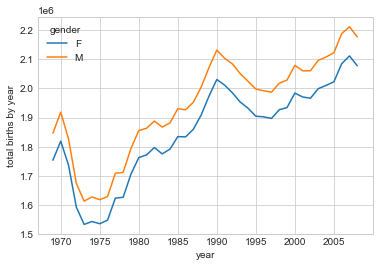

In [64]:
# plot above birth data 
plt.style.use('seaborn-whitegrid')
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births by year')

# births.groupby(['year', 'gender'])['births'].sum().unstack() # - tallies with the graph

<AxesSubplot:>

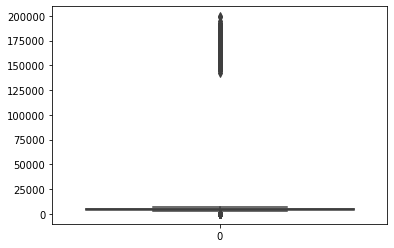

In [6]:
sns.boxplot(data=births['births'])

In [65]:
# detect outliers and remove them
q25, q75 = np.percentile(births['births'], 25), np.percentile(births['births'], 75)
print(q25)
print(q75)

4358.0
5289.5


In [7]:
iqr = q75 - q25
iqr

931.5

In [8]:
#calculate iqr cut off - 1.5 iqr
cut_off = iqr * 1.5
cut_off


1397.25

In [10]:
lower, upper = q25 - iqr, q75 + iqr
print(lower, upper)

3426.5 6221.0


In [15]:
# identify outliers 
data = births['births']
outliers = [x for x in data if x < lower or x > upper]
print(f'Number of identified outliers is {len(outliers)}')
#outliers

Number of identified outliers is 1017


In [31]:
# per book 
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
print(f"median is {mu}")
sig = .74 * (quartiles[2] - quartiles[0])
print(f"sigma. std dev is {sig}")
print(f"25th q is {quartiles[0]}, 50th q is {quartiles[1]}, 75th q is {quartiles[2]}")

median is 4812.0
sigma. std dev is 648.24
25th q is 4383.0, 50th q is 4812.0, 75th q is 5259.0


In [67]:
#filter values that are outside the cut off vals. use factor of 5
births = births.query('(births < @mu + 5*@sig) & (births > @mu - 5*@sig)')

In [68]:
# set day cl to int
births['day'] = births['day'].astype(int)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [69]:
# create a datetime index from yr, mo, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [70]:
births['decade'].unique()

array([1960, 1970, 1980])

In [35]:
births['dayofweek'] = births.index.day_of_week
births.head()

,year,month,day,gender,births,dayofweek,decade
1969-01-01,1969,1,1,F,4046,2,1960
1969-01-01,1969,1,1,M,4440,2,1960
1969-01-02,1969,1,2,F,4454,3,1960
1969-01-02,1969,1,2,M,4548,3,1960
1969-01-03,1969,1,3,F,4548,4,1960


<AxesSubplot:xlabel='dayofweek'>

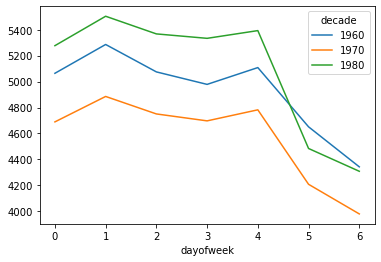

In [36]:
# plot by weekday for several decades
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()

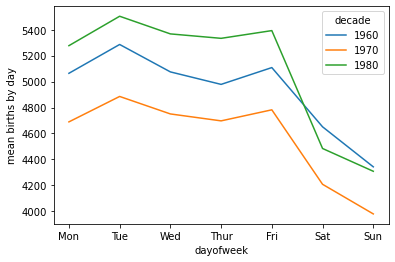

In [40]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set(xticks=range(7), xticklabels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');